In [1]:
# Importando pacotes necessários.
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mnist import MNIST
from scipy.spatial.distance import cdist
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score)


In [2]:
# Importando base completa mnist.
mnist = MNIST('..\\mnist_data')
mnist.gz = True
# Selecionando 20 mil imagens e atribuindo-as às bases de treino e teste
# mnist.load_training()[0] = dados das imagens 
# mnist.load_training()[1] = resposta da imagem
y = np.array(mnist.load_training()[1][0:15000] + mnist.load_testing()[1][0:5000])
x = np.array(mnist.load_training()[0][0:15000] + mnist.load_testing()[0][0:5000])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



images = mnist.load_training()[0][0:15000] + mnist.load_testing()[0][0:5000]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(len(images),len(images[0])) 

(20000, 784)

In [ ]:
# Formando uma imagem da base de dados.
img = Image.fromarray(np.array(images[0]).reshape(28,28).astype('uint8'), 'L')
img.resize((200,200))

In [3]:
# KNN.
n_neighbors = 15

accuracy = []
precision = []
recall = []
f1 = []

inicio = time.time()
for k in range(1,n_neighbors+1):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(x_train, y_train)
    
    y = knn_clf.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y))
    precision.append(precision_score(y_test, y, average=None))
    recall.append(recall_score(y_test, y, average=None))
    f1.append(f1_score(y_test, y, average=None))
fim = time.time()
print(fim - inicio)

1408.8256754875183


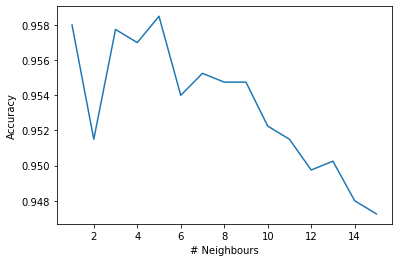

In [4]:
# Taxa de acurácia vs. número de vizinhos.
# Podemos observar que o modelo tem sua melhor acurácia com k entre 3 e 5.
plt.figure()
plt.plot(range(1,n_neighbors+1), accuracy)
plt.xlabel('# Neighbours')
plt.ylabel('Accuracy')
plt.show()

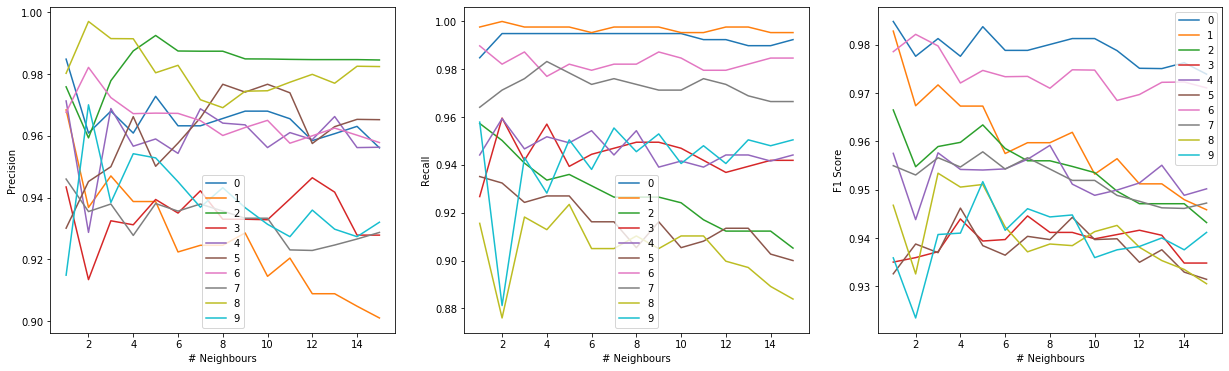

In [5]:
#Visualializando a precisão, recall e f1 score vs. número de vizinhos.
# Precision indica uma boa taxa de acerto dos das predições verdadeiras, 
# destacam-se os números 2 e 8, quase sempre acima de 98%, ou seja,
# de 100 vezes que o modelo oreveu o número 2, 98 era realmente o número 2,
# é importante para avaliar a taxa de
# falsos positivos.

# Recall apresenta a taxa de acerto das predições para cada classe , 
# destacam-se os números 0 e 1, com uma taxa de recall acima de 98%, ou seja,
# de 100 números "0", o modelo acertou 98, é importante para avaliar a taxa de
# falsos negativos.

# Recall apresenta a taxa de acerto das predições para cada classe , 
# destacam-se os números 0 e 1, com uma taxa de recall acime de 98%, ou seja,
# de 100 números "0", o modelo acertou 98, é importante para avaliar a taxa de
# falsos negativos.

# O F1 Score sendo a média harmônica do precisiona e recall, permite avaliar 
# a relação e equilibrio entre precisão e recall.

fig, axs = plt.subplots(1,3, figsize=(21, 6))
metrics = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1 Score']
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(len(metrics)):
    metric = np.array(metrics[i])
    for classes in range(len(labels)):
        axs[i].plot(range(1,n_neighbors+1), metric[:,classes], label=labels[classes])
    
    axs[i].set_xlabel('# Neighbours')
    axs[i].set_ylabel(metrics_names[i])
    axs[i].legend()

In [6]:
# Importando novamente os dados para a validação cruzada.
y = np.array(mnist.load_training()[1][0:15000] + mnist.load_testing()[1][0:5000])
x = np.array(mnist.load_training()[0][0:15000] + mnist.load_testing()[0][0:5000])
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
# Validação cruzada KNN.
kf = KFold(n_splits=5, shuffle=True)
n_neighbors = 20

accuracy = []
precision = []
recall = []
f1 = []

inicio = time.time()
for k in range(1,n_neighbors+1):
    acc = []
    prec=[]
    rec = []
    f1_aux=[]
    for train_index, validation_index in kf.split(x):
        knn_clf = KNeighborsClassifier(k)
        knn_clf.fit(x[train_index,:], y[train_index])

        y_validation = knn_clf.predict(x[validation_index])

        acc.append(accuracy_score(y[validation_index], y_validation))
        prec.append(precision_score(y[validation_index], y_validation, average=None))
        rec.append(recall_score(y[validation_index], y_validation, average=None))
        f1_aux.append(f1_score(y[validation_index], y_validation, average=None))
    accuracy.append(acc) 
    precision.append(prec)
    recall.append(rec)
    f1.append(f1_aux)
fim = time.time()
print(fim - inicio)

9640.431486845016


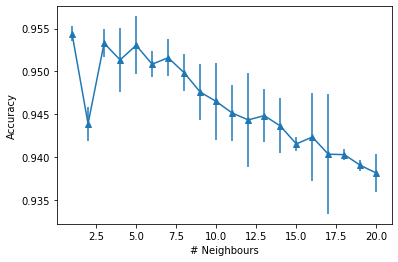

In [8]:
# Taxa de acurácia e seu intervalo de confiança vs. número de vizinhos.
# Podemos observar que o modelo tem sua maior taxa de acurácia com k=3 e menor intervalo de confiança com k=1 vizinho.
accuracy = np.array(accuracy)
mean = accuracy.mean(axis=1)
std = accuracy.std(axis=1)
plt.figure()
plt.errorbar(range(1,n_neighbors+1), mean, std, marker='^')
plt.xlabel('# Neighbours')
plt.ylabel('Accuracy')
plt.show()

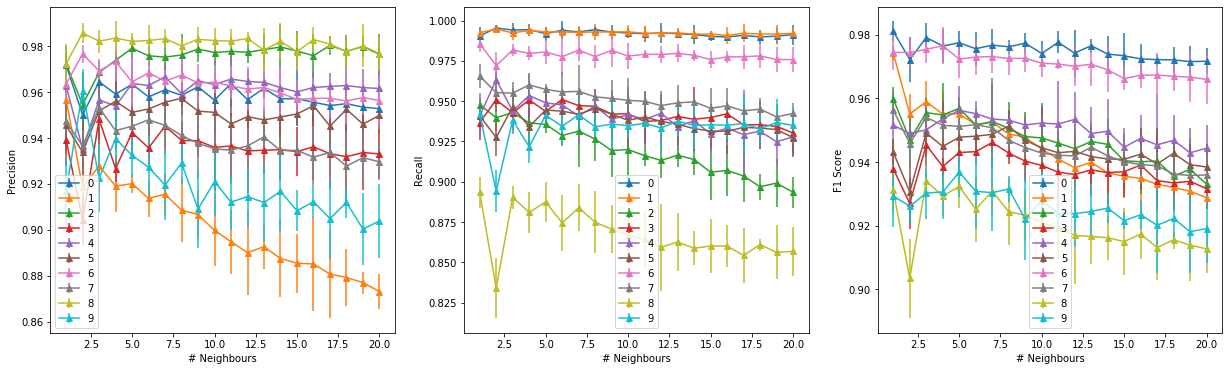

In [9]:
# Visualializando a precisão, recall e f1 score e intervalos de confiança vs. número de vizinhos.
# Precision indica uma boa taxa de acerto dos das predições verdadeiras, 
# destacam-se os números 2 e 8, quase sempre acima de 98%, ou seja,
# de 100 vezes que o modelo oreveu o número 2, 98 era realmente o número 2,
# é importante para avaliar a taxa de
# falsos positivos.

# xxRecall apresenta a taxa de acerto das predições para cada classe , 
# xxdestacam-se os números 0 e 1, com uma taxa de recall acime de 98%, ou seja,
# xxde 100 números "0", o modelo acertou 98, é importante para avaliar a taxa de
# xxfalsos negativos.

# xxRecall apresenta a taxa de acerto das predições para cada classe , 
# xxdestacam-se os números 0 e 1, com uma taxa de recall acima de 98%, ou seja,
# xxde 100 números "0", o modelo acertou 98, é importante para avaliar a taxa de
# xxfalsos negativos.

# xxO F1 Score sendo a média harmônica do precisiona e recall, permite avaliar 
# xxa relação e equilibrio entre precisão e recall.

fig, axs = plt.subplots(1,3, figsize=(21, 6))
metrics = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1 Score']

for i in range(len(metrics)):
    metric = np.array(metrics[i])
    mean = metric.mean(axis=1)
    std = metric.std(axis=1)

    
    for classes in range(len(labels)):
        axs[i].errorbar(range(1,n_neighbors+1), 
                        mean[:,classes], 
                        std[:,classes], 
                        label=labels[classes], 
                        marker='^')

    axs[i].set_xlabel('# Neighbours')
    axs[i].set_ylabel(metrics_names[i])
    axs[i].legend()

In [18]:
# Visualizar testes de acuracidade do classificador para cada classe e a matriz de confusão.


print("MEDINDO DADOS DE TESTE para cada classe")
print(classification_report(y[validation_index], y_validation))

print ("MATRIZ DE CONFUSAO")
print(confusion_matrix(y[validation_index], y_validation))


MEDINDO DADOS DE TESTE para cada classe
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       421
           1       0.86      1.00      0.92       450
           2       0.98      0.90      0.94       417
           3       0.92      0.95      0.93       376
           4       0.97      0.92      0.94       363
           5       0.95      0.91      0.93       349
           6       0.96      0.98      0.97       363
           7       0.94      0.95      0.95       436
           8       0.98      0.87      0.92       403
           9       0.92      0.94      0.93       422

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

MATRIZ DE CONFUSAO
[[419   0   1   0   0   0   1   0   0   0]
 [  0 448   0   0   0   0   1   0   1   0]
 [  4  15 375   3   2   1   1  12   3   1]
 [  0   7   3 356   0   3   1   2   2   2]
 [  0  13 

Eu acho que esse dígito é : 5


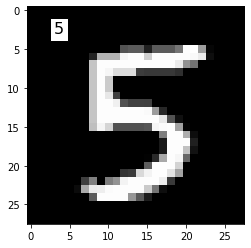

Eu acho que esse dígito é : 1


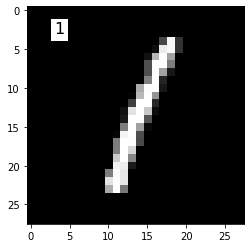

Eu acho que esse dígito é : 9


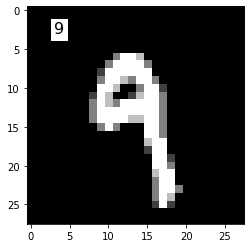

Eu acho que esse dígito é : 5


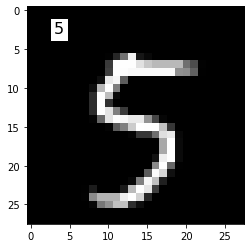

Eu acho que esse dígito é : 1


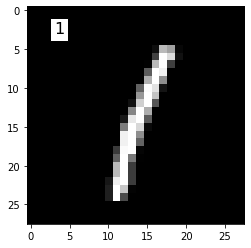

In [13]:
# loop testando alguns digitos, plotando sua imagem, a classe prevista e a classe real.

for i in np.random.randint(0, high=len(y[validation_index]), size=(5,)):
         # selecionando uma imagem e classificando-a
         image = x[validation_index][i]
         prediction = knn_clf.predict([image])[0]
         # mostrando a previsão         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((28,28))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("Eu acho que esse dígito é : {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
         cv2.waitKey(0)